# MPL (Multi Layer Perceptron)

O conteúdo dessa seção é uma continuação do explorado em [**Perceptron**](https://luccagkao.github.io/documentation.neural_networks/exercicios/perceptron/perceptron/). O MPL, nada mais é do que vários perceptrons juntos, com o que é chamado de camadas, onde cada perceptron processa o dado, gera um output e esse é inserido em outro perceptron, com outros pesos e talvez outras funções de ativação. De modo bem resumido, um MPL é uma combinação de diversas formas, de vários perceptrons diferentes.

Será apresentado primeiramente a parte matemática da atualização dos vários pesos internos do modelo, e posteriormente, a exploração da capacidade extra do MPL perante ao perceptron, a possibilidade de classificação de dados multi classe.


## A matemática da atualização dos pesos

Para o exercício sobre a atualização dos pesos, os dados utilizados foram:

**Dados de input:**

$\mathbf{x} = [0.5, -0.2]$

$y = 1.0$

**Pesos da camada interna:**

$\mathbf{W}^{(1)} = \begin{bmatrix} 0.3 & -0.1 \\ 0.2 & 0.4 \end{bmatrix}$

$\mathbf{b}^{(1)} = [0.1, -0.2]$

**Pesos da camada de output:**

$\mathbf{W}^{(2)} = [0.5, -0.3]$

$b^{(2)} = 0.2$

**Taxa de apredizado:** $\eta = 0.3$

**Função de ativação das camadas:** $\tanh()$

**Contabilização erro:** $ L = \frac{1}{N} (y - \hat{y})^2$

Como já foi dito, o MLP é um conjunto de perceptrons, então a ideia aqui presente é utilizar o x de input no "primeiro perceptron" e com a saída desse, aplicar no "segundo perceptron". Um ponto interessante de se ressaltar é que no *bias* para fins de melhora e otimização computacional, pode ser entendido como uma outra entrada, no entanto com o valor de 1, assim o seu valor sempre será o valor do seu respectivo peso. Tendo assim o vetor de entrada e seus respectivos pesos ($\mathbf{W}^{(1)}$):

$$
\mathbf{x}
=
\begin{bmatrix}
0.5\\[2pt]
-0.2\\[2pt]
1
\end{bmatrix}

\qquad

\mathbf{W}^{(1)}
=
\begin{bmatrix}
0.3 & 0.2 & 0.1\\
-0.1 & 0.4 & -0.2
\end{bmatrix}
$$

$$
\mathbf{z}^{(1)}
= \mathbf{W}^{(1)}\,\mathbf{x}
=
\begin{bmatrix}
0.3 & 0.2 & 0.1\\
-0.1 & 0.4 & -0.2
\end{bmatrix}
\begin{bmatrix}
0.5\\[2pt]
-0.2\\[2pt]
\end{bmatrix}
=
\begin{bmatrix}
0.21\\[2pt]
-0.33
\end{bmatrix}
$$


$$
\mathbf{z}^{(1)}
=
\begin{bmatrix}
0.21\\[2pt]
-0.33
\end{bmatrix}
$$

In [1]:
import numpy as np

x = np.array([[0.5], 
              [-0.2], 
              [1]])

W1 = np.array([[0.3, 0.2, 0.1],
               [-0.1, 0.4, -0.2]])

z1 = np.dot(W1, x)
z1

array([[ 0.21],
       [-0.33]])

Desse modo, com a saída do primeiro perceptron, é necessário aplicar a função de ativação, *tanh()*.

$$
\mathbf{h}^{(1)}=\tanh\!\big(\mathbf{z}^{(1)}\big)
=
\begin{bmatrix}
\tanh(0.21)\\[2pt]
\tanh(-0.33)
\end{bmatrix}
=
\begin{bmatrix}
0.2069665\\[2pt]
-0.31852078
\end{bmatrix}
$$

In [2]:
h1 = np.tanh(z1)
h1

array([[ 0.2069665 ],
       [-0.31852078]])

Utilizando $\mathbf{h}^{(1)}$ como input para o segundo perceptron e os pesos novamente contando com o *bias*:

$$
\mathbf{h}^{(1)}
=
\begin{bmatrix}
0.2069665\\[2pt]
-0.31852078\\[2pt]
1
\end{bmatrix}

\qquad

\mathbf{W}^{(2)}
=
\begin{bmatrix}
0.5 & -0.3 & 0.2
\end{bmatrix}
$$

$$
u^{(2)} \;=\; \mathbf{W}^{(2)}\,\mathbf{h}
\;=\;
\begin{bmatrix}0.5 & -0.3 & 0.2\end{bmatrix}
\begin{bmatrix}
0.2069665\\[2pt]
-0.31852078\\[2pt]
1
\end{bmatrix}
\;
=\; 0.39903948
$$

$$
u^{(2)} = 0.39903948
$$


In [3]:
h1_bias = np.vstack([h1, [[1]]])

W2 = np.array([0.5, -0.3, 0.2])

u2 = np.dot(W2, h1_bias)
u2

array([0.39903948])

Aplicando a função de ativação na segunda saída, encontra-se o resultado previsto pelo modelo para o y, no caso, $\hat{y}$.

$$
\hat{y}=\tanh\ (u^{(2)})
=
\tanh\ (0.39903948)
=
0.37912681
$$

In [4]:
y_hat = np.tanh(u2)
y_hat

array([0.37912681])


Com isso, é possível contabilizar o erro, que para o exemplo será utilizado o MSE. Como no caso aplicado, N é igual a 1, temos que o erro no caso é dado por:

$$L = (y - \hat{y})^2$$

$$L = (1 - 0.37912681)^2 = 0.38548352$$

In [5]:
y = 1
mse = (y - y_hat) ** 2
mse

array([0.38548352])

Com a computação do erro, inicia-se o processo de atualização dos pesos, e ele funciona muito parecido com o formato do perceptron, no entanto é necessário derivar o erro sobre todos os pesos e *bias*.

Começando com $\displaystyle \frac{\partial L}{\partial \hat{y}}$, e então:

$\displaystyle \frac{\partial L}{\partial u^{(2)}}$, tendo em vista que, a derivada de $tanh$ é $\displaystyle \frac{d}{du} \tanh(u) = 1 \tanh^2(u)$

Os gradientes para a camada de saída sendo:

$\displaystyle \frac{\partial L}{\partial \mathbf{W}^{(2)}},\displaystyle \frac{\partial L}{\partial b^{(2)}}$

Propagando para a primeira camada calculada, o que é chamado de *camada oculta*.

$\displaystyle \frac{\partial L}{\partial \mathbf{h}^{(1)}}$, $\displaystyle \frac{\partial L}{\partial \mathbf{z}^{(1)}}$

E então os gradientes da camada oculta:

$\displaystyle \frac{\partial L}{\partial \mathbf{W}^{(1)}}$ , $\displaystyle \frac{\partial L}{\partial \mathbf{b}^{(1)}}$

$
\displaystyle \frac{\partial L}{\partial \hat{y}} = 2 \cdot (\hat{y}-y) = 2 \cdot (0.37912681-1) = -1.24174639
$

In [6]:
dL_dy_hat = 2 * (y_hat - y)
dL_dy_hat

array([-1.24174639])

$
\displaystyle \frac{\partial L}{\partial u^{(2)}} =
\underbrace{2\cdot(\hat{y}-y)}_{\frac{\partial L}{\partial \hat y}}\;\cdot\underbrace{(1-\hat{y}^2)}_{\tanh'(u^{(2)})} =
2 \cdot (0.37912681 - 1) \cdot (1 - 0.37912681^2) = 
-1.06326132
$

In [7]:
dL_du2 = 2 * (y_hat - y) * (1 - y_hat ** 2)
dL_du2

array([-1.06326132])

Tendo,

$\displaystyle \frac{\partial L}{\partial u^{(2)}} = \ \delta^{(2)}$

Temos que:

$
\displaystyle \frac{\partial L}{\partial W^{(2)}} = \delta^{(2)}\,\big(h^{(1)}\big)^\top =
-1.06326132
\cdot
\begin{bmatrix}
0.2069665 & -0.31852078
\end{bmatrix} =
\begin{bmatrix}
-0.22005947 & 0.33867082
\end{bmatrix}
$

In [8]:
dL_dW2 = dL_du2 * h1.reshape(1,2)
dL_dW2

array([[-0.22005947,  0.33867082]])

$\displaystyle \frac{\partial L}{\partial b^{(2)}} = \delta^{(2)} = -1.06326132$

In [9]:
dL_db2 = dL_du2
dL_db2

array([-1.06326132])

$
\displaystyle
\frac{\partial L}{\partial h^{(1)}} \;=\;
\left(\frac{\partial u^{(2)}}{\partial h^{(1)}}\right)^\top
\frac{\partial L}{\partial u^{(2)}}
\;=\; \big(W^{(2)}\big)^\top\,\delta^{(2)} = 
\begin{bmatrix}
0.5\\[2pt]
-0.3
\end{bmatrix} \cdot -1.06326132 = 
\begin{bmatrix}
-0.53163066\\[2pt]
0.3189784
\end{bmatrix}
$

In [10]:
W2t = np.array([[0.5],
                [-0.3]])

dL_dh1 = W2t * dL_du2
dL_dh1

array([[-0.53163066],
       [ 0.3189784 ]])

$
\displaystyle
\frac{\partial L}{\partial z^{(1)}} =\ \delta^{(1)}
\;=\; \frac{\partial L}{\partial h^{(1)}}
\;\cdot\;\Big(1-\big(h^{(1)}\big)^{\cdot 2}\Big)
\;=\; \underbrace{\big(W^{(2)}\big)^\top\,\cdot \delta^{(2)}}_{\frac{\partial L}{\partial h^{(1)}}}
\;\cdot\;\Big(1-\big(h^{(1)}\big)^{\cdot 2}\Big)
$


Tendo,

$
\displaystyle
\Big(1-\big(h^{(1)}\big)^{2}\Big) =
\begin{bmatrix}
0.95716487\\[2pt]
0.89854451
\end{bmatrix}
$

Temos que,

$
\displaystyle
\frac{\partial L}{\partial z^{(1)}} \ = 
\begin{bmatrix}
-0.53163066\\[2pt]
0.3189784
\end{bmatrix} \cdot
\begin{bmatrix}
0.95716487\\[2pt]
0.89854451
\end{bmatrix} =
\begin{bmatrix}
-0.50885819\\[2pt]
0.28661629
\end{bmatrix}
$

In [11]:
dL_dz1 = dL_dh1 * (1 - h1 ** 2)
dL_dz1

array([[-0.50885819],
       [ 0.28661629]])

$
\displaystyle \frac{\partial L}{\partial W^{(1)}} = \delta^{(1)}\,x^\top =
\begin{bmatrix}
-0.50885819\\[2pt]
0.28661629
\end{bmatrix} \cdot
\begin{bmatrix}
0.5 & -0.2
\end{bmatrix} =
\begin{bmatrix}
-0.25442909 & 0.10177164\\
0.14330814 & -0.05732326
\end{bmatrix}
$

In [12]:
xT = np.array([0.5, -0.2])
dL_dW1 = dL_dz1 * xT
dL_dW1

array([[-0.25442909,  0.10177164],
       [ 0.14330814, -0.05732326]])

$
\displaystyle
\frac{\partial L}{\partial b^{(1)}} = \delta^{(1)} = 
\begin{bmatrix}
-0.50885819\\[2pt]
0.28661629
\end{bmatrix}
$

In [13]:
dL_db1 = dL_dz1
dL_db1

array([[-0.50885819],
       [ 0.28661629]])

Com todos os gradientes calculados, é possível fazer a atualização dos pesos de acordo com o $\eta$, que no caso aplicado $\eta = 0.3$.

$
\displaystyle \mathbf{W}^{(2)} \leftarrow \mathbf{W}^{(2)} - \eta \frac{\partial L}{\partial \mathbf{W}^{(2)}} = 
\begin{bmatrix}
0.5 & -0.3
\end{bmatrix} - 
0.3 \cdot
\begin{bmatrix}
-0.22005947 & 0.33867082
\end{bmatrix} = 
\begin{bmatrix}
0.56601784 & -0.40160125
\end{bmatrix}
$

In [14]:
W2_s_bias = np.array([0.5, -0.3])

eta = 0.3

W2_att = W2_s_bias - (eta * dL_dW2)
W2_att

array([[ 0.56601784, -0.40160125]])

$
\displaystyle
b^{(2)} \leftarrow b^{(2)} - \eta \frac{\partial L}{\partial b^{(2)}} = 
0.2 - (0.3 \cdot -1.06326132) = 
0.5189784
$

In [15]:
b2 = 0.2
b2_att = b2 - (eta * dL_db2)
b2_att

array([0.5189784])

$
\displaystyle \mathbf{W}^{(1)} \leftarrow \mathbf{W}^{(1)} - \eta \frac{\partial L}{\partial \mathbf{W}^{(1)}} =
\begin{bmatrix} 0.3 & -0.1 \\ 0.2 & 0.4 \end{bmatrix} - 
0.3 \cdot
\begin{bmatrix}
-0.25442909 & 0.10177164\\
0.14330814 & -0.05732326
\end{bmatrix} = 
\begin{bmatrix}
0.37632873 & -0.13053149\\
0.15700756 & 0.41719698
\end{bmatrix}
$

In [16]:
W1_s_bias = np.array([[0.3, -0.1],
               [0.2, 0.4]])
W1_att = W1_s_bias - (eta * dL_dW1)
W1_att

array([[ 0.37632873, -0.13053149],
       [ 0.15700756,  0.41719698]])

$
\displaystyle
b^{(1)} \leftarrow b^{(1)} - \eta \frac{\partial L}{\partial b^{(1)}} = 
\begin{bmatrix}
0.1 & -0.2
\end{bmatrix} - (0.3 \cdot \begin{bmatrix}
-0.50885819 & 0.28661629
\end{bmatrix}) = 
\begin{bmatrix}
0.25265746 & -0.28598489
\end{bmatrix}
$

In [17]:
b1 = np.array([0.1, -0.2])
b1_att = b1 - (eta * dL_db1.reshape(1,2))
b1_att

array([[ 0.25265746, -0.28598489]])

Dessa forma, com todos os pesos atualizados é possível fazer o comparativo:

**Pesos inicias:**

$\mathbf{W}^{(1)} = \begin{bmatrix} 0.3 & -0.1 \\ 0.2 & 0.4 \end{bmatrix}$

$\mathbf{b}^{(1)} = [0.1, -0.2]$

$\mathbf{W}^{(2)} = [0.5, -0.3]$

$b^{(2)} = 0.2$

**Pesos atualizados:**

$\mathbf{W}^{(1)} = \begin{bmatrix} 0.37632873 & -0.13053149 \\ 0.15700756 & 0.41719698 \end{bmatrix}$

$\mathbf{b}^{(1)} = [0.25265746, -0.28598489]$

$\mathbf{W}^{(2)} = [0.56601784, -0.40160125]$

$b^{(2)} = 0.5189784$

In [18]:
print("Pesos inicias")
print(f"W1: \n{W1_s_bias}\n")
print(f"b1: \n{b1}\n")
print(f"W2: \n{W2_s_bias}\n")
print(f"b2: \n{b2}\n")

print("Pesos atualizados")
print(f"W1: \n{W1_att}\n")
print(f"b1: \n{b1_att}\n")
print(f"W2: \n{W2_att}\n")
print(f"b2: \n{b2_att}")

Pesos inicias
W1: 
[[ 0.3 -0.1]
 [ 0.2  0.4]]

b1: 
[ 0.1 -0.2]

W2: 
[ 0.5 -0.3]

b2: 
0.2

Pesos atualizados
W1: 
[[ 0.37632873 -0.13053149]
 [ 0.15700756  0.41719698]]

b1: 
[[ 0.25265746 -0.28598489]]

W2: 
[[ 0.56601784 -0.40160125]]

b2: 
[0.5189784]


## Classificação binária com MLP

Seguindo adiante na exploração do poder do MLP, o exercício de analisar dados sintéticos, porém buscando uma maior complexidade sobre os dados, isto é, a aproximação de dados reais, nesse momento foi utilizada a função `make_classification()` da biblioteca *Scikit-Learn*. Isso pois, assim, é possível criar clusters de dados com maiores minúncias, o que traz um aspecto diferente para a exploração. Diante disso, os parâmetros utilizados na geração dos dados foram os seguintes:


- Número de amostras `n_samples`: 1000
- Número de classes: 2
- Número de clusters por classe `n_clusters_per_class`: 1 em uma e 2 em outra
- Número de features `n_features`: 2
    - Número de features efetivas `n_informative`: 2
    - Número de features redundantes `n_redundant`: 2
- Dispersão das classes `class_sep`: 1.6
- Ruído das classes `flip_y`: 0.02
- Semente de aleatorização `random_state`: 42

Para aplicação e estudo sobre os desafios propostos, foi necessário criar uma classe para calcular todos os passos de treino, teste, atualização dos pesos. Diante disso, foi construída a seguinte classe.

In [19]:
import numpy as np
from dataclasses import dataclass
from typing import Iterable, List, Tuple, Optional, Dict

@dataclass
class TrainingHistory:
    epoch: list
    train_loss: list
    train_accuracy: list
    val_loss: list
    val_accuracy: list
    grad_norm: list
    weight_norm: list

    def as_dict(self) -> Dict[str, list]:
        return {
            "epoch": self.epoch,
            "train_loss": self.train_loss,
            "train_accuracy": self.train_accuracy,
            "val_loss": self.val_loss,
            "val_accuracy": self.val_accuracy,
            "grad_norm": self.grad_norm,
            "weight_norm": self.weight_norm,
        }

class MLPClassifierScratch:
    def __init__(
        self,
        x: np.ndarray,
        y: np.ndarray,
        hidden_layer_sizes: Iterable[int] = (16,),
        activation: str = "tanh",
        output_activation: Optional[str] = None,
        loss: Optional[str] = None,
        eta: float = 0.01,
        batch_size: int = 32,
        max_epochs: int = 200,
        validation_fraction: float = 0.0,
        patience: int = 20,
        min_delta: float = 1e-4,
        seed: int = 42,
        weight_init: str = "auto",
        bias_as_weight: bool = False,
    ):
        self.X = self._as_2d_array(x)
        self.y_input = y
        self.n_samples, self.n_features = self.X.shape

        self.Y, self.n_classes, self.classes_, self.target_type = self._normalize_targets(y)

        self.hidden_layer_sizes = tuple(int(h) for h in hidden_layer_sizes)
        self.activation = activation.lower()
        assert self.activation in {"relu","tanh","sigmoid","identity"}

        if output_activation is None:
            output_activation = "sigmoid" if self.target_type == "binary" else ("softmax" if self.target_type == "multiclass" else "tanh")
        if loss is None:
            loss = "bce" if output_activation == "sigmoid" else ("cce" if output_activation == "softmax" else "mse")

        self.output_activation = output_activation.lower()
        assert self.output_activation in {"sigmoid","softmax","tanh","identity"}
        
        self.loss_name = loss.lower()
        assert self.loss_name in {"bce","cce","mse"}

        self.eta = float(eta)
        self.batch_size = int(batch_size)
        self.max_epochs = int(max_epochs)
        self.validation_fraction = float(validation_fraction)
        self.es_patience = int(patience)
        self.es_min_delta = float(min_delta)
        self.seed = int(seed)
        
        self.weight_init = weight_init.lower()
        assert self.weight_init in {"auto","xavier","he"}
        
        self.bias_as_weight = bool(bias_as_weight)

        self.rng = np.random.default_rng(self.seed)

        if self.validation_fraction > 0.0:
            n_val = max(1, int(self.n_samples * self.validation_fraction))
            idx = self.rng.permutation(self.n_samples)
            val_idx, tr_idx = idx[:n_val], idx[n_val:]
            self.Xtr, self.Ytr = self.X[tr_idx], self.Y[tr_idx]
            self.Xval, self.Yval = self.X[val_idx], self.Y[val_idx]
        else:
            self.Xtr, self.Ytr = self.X, self.Y
            self.Xval, self.Yval = None, None

        out_dim = self.n_classes if self.output_activation == "softmax" else 1

        if self.loss_name == "mse" and self.output_activation in {"tanh","identity"} and self.n_classes > 1:
            out_dim = self.n_classes

        layer_sizes = [self.n_features] + list(self.hidden_layer_sizes) + [out_dim]
        self.params = self._init_params(layer_sizes)

        self.loss_per_epoch: List[float] = []
        self.accuracy_per_epoch: List[float] = []
        self.val_loss_per_epoch: List[float] = []
        self.val_accuracy_per_epoch: List[float] = []
        self.history = TrainingHistory(epoch=[], train_loss=[], train_accuracy=[], val_loss=[], val_accuracy=[], grad_norm=[], weight_norm=[])
        self.converged: bool = False
        self.stop_reason: str = "max_epochs"
        self.epochs_run: int = 0

    @staticmethod
    def _as_2d_array(x: np.ndarray) -> np.ndarray:
        x = np.asarray(x, dtype=np.float64)
        if x.ndim == 1: x = x.reshape(-1, 1)
        assert x.ndim == 2
        return x

    @staticmethod
    def _normalize_targets(y: np.ndarray) -> Tuple[np.ndarray, int, np.ndarray, str]:
        y_arr = np.asarray(y)
        
        if y_arr.ndim == 2 and y_arr.shape[1] > 1:
            n_classes = y_arr.shape[1]
            return y_arr.astype(np.float64), n_classes, np.arange(n_classes), "multiclass"
        
        y_flat = y_arr.reshape(-1)
        vals = np.unique(y_flat)
        
        if set(vals).issubset({0,1}) and len(vals) <= 2:
            return y_flat.astype(np.float64).reshape(-1,1), 2, np.array([0,1]), "binary"
        
        if np.issubdtype(y_flat.dtype, np.integer) and vals.min() >= 0 and (vals == np.arange(vals.max()+1)).all():
            K = int(vals.max()+1)
            onehot = np.zeros((y_flat.shape[0], K), dtype=np.float64)
            onehot[np.arange(y_flat.shape[0]), y_flat.astype(int)] = 1.0
            return onehot, K, np.arange(K), "multiclass"
        
        return y_flat.astype(np.float64).reshape(-1,1), 1, np.array([0]), "continuous"

    def _init_params(self, layer_sizes: List[int]) -> Dict[str, np.ndarray]:
        params: Dict[str, np.ndarray] = {}
        for layer_idx in range(1, len(layer_sizes)):
            fan_in = layer_sizes[layer_idx-1]
            fan_out = layer_sizes[layer_idx]
            fan_in_eff = fan_in + 1 if self.bias_as_weight else fan_in

            if self.weight_init == "auto":
                scale = np.sqrt(2.0/fan_in_eff) if self.activation == "relu" else np.sqrt(1.0/fan_in_eff)
            elif self.weight_init == "xavier":
                scale = np.sqrt(1.0/fan_in_eff)
            else:
                scale = np.sqrt(2.0/fan_in_eff)

            W = self.rng.normal(0.0, scale, size=(fan_out, fan_in_eff))
            params[f"W{layer_idx}"] = W

            if not self.bias_as_weight:
                params[f"b{layer_idx}"] = np.zeros((1, fan_out))

        return params

    # -------------------- ativações --------------------
    @staticmethod
    def _sigmoid(z): return 1.0 / (1.0 + np.exp(-z))

    @staticmethod
    def _softmax(z):
        z = z - np.max(z, axis=1, keepdims=True)
        expz = np.exp(z)
        return expz / np.sum(expz, axis=1, keepdims=True)

    def _act(self, z):
        if self.activation == "relu":
            return np.maximum(0, z)
        
        if self.activation == "tanh":
            return np.tanh(z)
        
        if self.activation == "sigmoid":
            return self._sigmoid(z)
        
        return z

    def _act_deriv(self, a, z):
        if self.activation == "relu":
            return (z > 0).astype(z.dtype)
        
        if self.activation == "tanh":
            return 1.0 - a**2
        
        if self.activation == "sigmoid":
            return a * (1.0 - a)
        
        return np.ones_like(z)

    def _forward(self, X: np.ndarray) -> Tuple[List[np.ndarray], List[np.ndarray]]:
        activations = [X]
        preactivations: List[np.ndarray] = []
        total_layers = len(self.hidden_layer_sizes) + 1

        for layer_idx in range(1, total_layers):
            A_prev = activations[-1]
            
            if self.bias_as_weight:
                A_prev_aug = np.concatenate([A_prev, np.ones((A_prev.shape[0], 1))], axis=1)
                z_l = A_prev_aug @ self.params[f"W{layer_idx}"].T
            else:
                z_l = A_prev @ self.params[f"W{layer_idx}"].T + self.params[f"b{layer_idx}"]
            
            a_l = self._act(z_l)
            preactivations.append(z_l)
            activations.append(a_l)

        A_prev = activations[-1]

        if self.bias_as_weight:
            A_prev_aug = np.concatenate([A_prev, np.ones((A_prev.shape[0], 1))], axis=1)
            z_out = A_prev_aug @ self.params[f"W{total_layers}"].T
        else:
            z_out = A_prev @ self.params[f"W{total_layers}"].T + self.params[f"b{total_layers}"]

        if self.output_activation == "sigmoid":
            a_out = self._sigmoid(z_out)

        elif self.output_activation == "softmax":
            a_out = self._softmax(z_out)

        elif self.output_activation == "tanh":
            a_out = np.tanh(z_out)

        else:
            a_out = z_out

        preactivations.append(z_out)
        activations.append(a_out)
        
        return preactivations, activations

    def _loss_and_acc(self, Y_true: np.ndarray, Y_hat: np.ndarray) -> Tuple[float, float]:
        m = Y_true.shape[0]
        eps = 1e-12

        if self.loss_name == "bce":
            p = np.clip(Y_hat.reshape(-1,1), eps, 1-eps)
            loss = -(Y_true*np.log(p) + (1-Y_true)*np.log(1-p)).mean()

        elif self.loss_name == "cce":
            p = np.clip(Y_hat, eps, 1-eps)
            loss = -np.sum(Y_true*np.log(p)) / m

        else:
            loss = np.mean((Y_true - Y_hat)**2)

        if self.output_activation == "softmax":
            y_pred = np.argmax(Y_hat, axis=1)
            y_true = np.argmax(Y_true, axis=1)
            acc = (y_pred == y_true).mean()

        elif self.output_activation == "sigmoid":
            y_pred = (Y_hat.reshape(-1) >= 0.5).astype(int)
            y_true = Y_true.reshape(-1).astype(int)
            acc = (y_pred == y_true).mean()

        else:
            acc = np.nan

        return float(loss), float(acc)

    def _backward(self, preactivations: List[np.ndarray], activations: List[np.ndarray], Y_true: np.ndarray) -> Dict[str, np.ndarray]:
        grads: Dict[str, np.ndarray] = {}
        m = Y_true.shape[0]
        L = len(self.hidden_layer_sizes) + 1

        A_out = activations[-1]
        Z_out = preactivations[-1]
        A_prev = activations[-2]

        if self.loss_name == "bce" and self.output_activation == "sigmoid":
            dZ = A_out - Y_true

        elif self.loss_name == "cce" and self.output_activation == "softmax":
            dZ = A_out - Y_true

        elif self.loss_name == "mse":
            if self.output_activation == "tanh":
                gprime = 1.0 - np.tanh(Z_out)**2

            elif self.output_activation == "sigmoid":
                s = self._sigmoid(Z_out)
                gprime = s*(1.0 - s)

            else:
                gprime = np.ones_like(Z_out)

            dZ = 2.0*(A_out - Y_true)*gprime

        else:
            raise ValueError("Combinação de loss/saída não suportada.")

        if self.bias_as_weight:
            A_prev_aug = np.concatenate([A_prev, np.ones((m,1))], axis=1)
            grad_W = (dZ.T @ A_prev_aug) / m
            grads[f"W{L}"] = grad_W
            dA_prev = dZ @ self.params[f"W{L}"][:, :-1]
        
        else:
            grad_W = (dZ.T @ A_prev) / m
            grad_b = dZ.mean(axis=0, keepdims=True)
            grads[f"W{L}"] = grad_W
            grads[f"b{L}"] = grad_b
            dA_prev = dZ @ self.params[f"W{L}"]

        for layer_idx in range(L-1, 0, -1):
            Z_l = preactivations[layer_idx-1]
            A_l = activations[layer_idx]
            A_prev = activations[layer_idx-1]
            dG = self._act_deriv(A_l, Z_l)
            dZ = dA_prev * dG

            if self.bias_as_weight:
                A_prev_aug = np.concatenate([A_prev, np.ones((m,1))], axis=1)
                grad_W = (dZ.T @ A_prev_aug) / m
                grads[f"W{layer_idx}"] = grad_W
                if layer_idx > 1:
                    dA_prev = dZ @ self.params[f"W{layer_idx}"][:, :-1]
            
            else:
                grad_W = (dZ.T @ A_prev) / m
                grad_b = dZ.mean(axis=0, keepdims=True)
                grads[f"W{layer_idx}"] = grad_W
                grads[f"b{layer_idx}"] = grad_b
                if layer_idx > 1:
                    dA_prev = dZ @ self.params[f"W{layer_idx}"]

        return grads

    def _update(self, grads: Dict[str, np.ndarray]):
        total_layers = len(self.hidden_layer_sizes) + 1
        for layer_idx in range(1, total_layers+1):
            self.params[f"W{layer_idx}"] -= self.eta * grads[f"W{layer_idx}"]
            if not self.bias_as_weight:
                self.params[f"b{layer_idx}"] -= self.eta * grads[f"b{layer_idx}"]

    def train(self, patience: Optional[int] = None, min_delta: Optional[float] = None, verbose: bool = False):
        if patience is None: patience = self.es_patience
        if min_delta is None: min_delta = self.es_min_delta

        best = np.inf
        best_params = {k: v.copy() for k, v in self.params.items()}
        patience_count = 0

        self.loss_per_epoch.clear()
        self.accuracy_per_epoch.clear()
        self.val_loss_per_epoch.clear()
        self.val_accuracy_per_epoch.clear()
        
        self.history = TrainingHistory(epoch=[], train_loss=[], train_accuracy=[], val_loss=[], val_accuracy=[], grad_norm=[], weight_norm=[])
        
        self.stop_reason = "max_epochs"; self.converged = False

        Xtr, Ytr = self.Xtr, self.Ytr
        for epoch in range(self.max_epochs):
            idx = self.rng.permutation(len(Xtr))
            Xs, Ys = Xtr[idx], Ytr[idx]

            grad_norm_total = 0.0
            for start in range(0, len(Xs), self.batch_size):
                xb = Xs[start:start+self.batch_size]
                yb = Ys[start:start+self.batch_size]
                preacts, acts = self._forward(xb)
                grads = self._backward(preacts, acts, yb)

                for g in grads.values():
                    grad_norm_total += float(np.linalg.norm(g))
                self._update(grads)

            _, act_tr = self._forward(Xtr)
            loss_tr, acc_tr = self._loss_and_acc(Ytr, act_tr[-1])
            self.loss_per_epoch.append(loss_tr)
            self.accuracy_per_epoch.append(acc_tr if not np.isnan(acc_tr) else None)

            if self.Xval is not None:
                _, act_val = self._forward(self.Xval)
                loss_val, acc_val = self._loss_and_acc(self.Yval, act_val[-1])
                self.val_loss_per_epoch.append(loss_val)
                self.val_accuracy_per_epoch.append(acc_val if not np.isnan(acc_val) else None)
                monitor = loss_val
            else:
                loss_val = None
                acc_val = None
                monitor = loss_tr

            weight_norm_total = 0.0
            total_layers = len(self.hidden_layer_sizes) + 1

            for l in range(1, total_layers+1):
                W = self.params[f"W{l}"]
                W_use = W[:, :-1] if self.bias_as_weight else W
                weight_norm_total += float(np.linalg.norm(W_use))

            self.history.epoch.append(epoch+1)
            self.history.train_loss.append(loss_tr)
            self.history.train_accuracy.append(acc_tr if not np.isnan(acc_tr) else None)
            self.history.val_loss.append(loss_val)
            self.history.val_accuracy.append(acc_val if not np.isnan(acc_val) else None)
            self.history.grad_norm.append(grad_norm_total)
            self.history.weight_norm.append(weight_norm_total)

            if monitor + self.es_min_delta < best:
                best = float(monitor)
                best_params = {k: v.copy() for k, v in self.params.items()}
                patience_count = 0
            else:
                patience_count += 1

            if verbose:
                msg = f"Epoch {epoch+1:4d} | loss={loss_tr:.4f}"
                if acc_tr is not None: msg += f" acc={acc_tr:.3f}"
                if loss_val is not None:
                    msg += f" | val_loss={loss_val:.4f}"
                    if acc_val is not None: msg += f" val_acc={acc_val:.3f}"
                print(msg)

            if patience_count >= self.es_patience:
                self.stop_reason = f"No improvement for {self.es_patience} epochs"
                break

            self.epochs_run = epoch + 1

        self.params = best_params
        if patience_count < self.es_patience and self.epochs_run < self.max_epochs:
            self.converged = True
            self.stop_reason = "Early stopping"
        elif self.epochs_run == self.max_epochs:
            self.stop_reason = "max_epochs"

    def get_history(self) -> TrainingHistory:
        return self.history

    def history_as_dict(self) -> Dict[str, list]:
        return self.history.as_dict()

    def predict_proba(self, X_test: np.ndarray) -> np.ndarray:
        X = self._as_2d_array(X_test)
        _, activations = self._forward(X)
        out = activations[-1]
        if self.output_activation == "sigmoid":
            return out.reshape(-1)
        return out

    def predict(self, X_test: np.ndarray, threshold: float = 0.5) -> np.ndarray:
        proba = self.predict_proba(X_test)
        if self.output_activation == "softmax":
            return np.argmax(proba, axis=1)
        if self.output_activation == "sigmoid":
            return (proba >= threshold).astype(int)
        return proba.reshape(-1)

    def score(self, X_test: np.ndarray, y_test: np.ndarray) -> float:
        y_true = np.asarray(y_test).reshape(-1)
        y_pred = self.predict(X_test)
        
        if y_pred.ndim == 1 and y_true.ndim == 1:
            return float((y_pred == y_true).mean())
        
        return float('nan')

A principal diferença dessa classe, para a classe utilizada na secção do algoritmo de Perceptron, é a capacidade da classe lidar com as várias camadas do modelo. Isso é, a ideia de os dados entrarem, serem processados por neurônios de uma camada, ter um output que é utilizado em outra camada, e outra, até a última que realmente tem um output para prever a variável dependente naquela observação.

Para isso, a classe conta com a entrad: dos dados; da quantidade de camadas que o modelo terá; qual função de ativação vai ser utilizada; qual função de perda; a taxa de aprendizagem; o tamanho do batch de treinamento; a quantidade de épocas para treinar; a parcela de validação que será utilizada; qual o *patience* aceito para o critério de parada; a semente de aleatorização a ser utilizada; como os pessos devem ser gerados (aleatórios) e como o bias deve ser interpretado, como um peso ou um argumento extra.

Com relação ao funcionamento matemático da classe, ela basicamente aplica todas as contas que foram feitas na parte [**A matemática da atualização dos pesos**](https://luccagkao.github.io/documentation.neural_networks/exercicios/mlp/mlp/#a-matematica-da-atualizacao-dos-pesos). Além dos cálculos de predição e atualização dos pesos, a classe conta com o armazenamento dos dados de treinamento e teste, para posterior análise, a partir da classe `TrainingHistory`.

Partindo para implementação da classe nesse primeiro conjunto de dados, esse pode ser feito da seguinte forma.

In [20]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_STATE = 42

XA, yA = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5, 0.5],
    class_sep=1.6,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

XA0  = XA[yA == 0]

XB, yB = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=[0.5, 0.5],
    class_sep=1.6,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

XB1b = XB[yB == 1]

X = np.vstack([XA0, XB1b])
y = np.concatenate([
    np.zeros(len(XA0), dtype=int),
    np.ones (len(XB1b), dtype=int)
])

Para criar as duas classes com números de clusters diferentes, é necessário criar duas classes de forma manual, uma vez que a função `make_classification()`, não aceita receber uma tupla para `n_clusters_per_class`, para fazer diferentes clusters, para diferentes classes. Uma vez feita as classes de forma separada e depois concatenada, é necessário fazer os splits para o treinamento e teste.

In [21]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

Seguindo a separação proposta, foram utilizados 80% dos dados no treinamento, e 20% para o teste final

In [22]:

mlp = MLPClassifierScratch(
    Xtr, ytr,
    hidden_layer_sizes=(16,),
    activation="tanh",
    output_activation="sigmoid",
    loss="bce",
    eta=0.05,
    batch_size=32,
    max_epochs=400,
    validation_fraction=0.2,
    patience=30,
    seed=RANDOM_STATE,
    bias_as_weight=True
)

mlp.train(verbose=False)

Para o modelo em si, foi utilizado um MLP com apenas uma camada oculta, aquela que gerará informações para a camada final gerar a predição sobre o *y*, e essa contou com 16 neurônios de procesamento. As funções de ativação aplicadas foram, *tanh()* nas camadas ocultas e *sigmoid()* na camada final. Além disso, a métrica de perda utilizada foi a BCE. Os pontos fortes desse tipo de métrica de erro é a penalização das previsões confiantes e erradas, exemplo: prever 0.99 quando o rótulo é 0 gera perda alta. E além disso, incentiva probabilidades bem calibradas, quanto mais perto das verdadeiras, menor a perda.

Como método de parada antecipada, a quantidade de épocas sem melhora na taxa de perda foram de 30 e para melhora computacional, os *bias* foram computados como um peso a mais na matriz de pesos.

In [23]:
print("Razão de parada:", mlp.stop_reason)
print("Acurácia de teste:", mlp.score(Xte, yte) * 100)

Razão de parada: No improvement for 30 epochs
Acurácia de teste: 98.50746268656717


Interessante observar sobre a aplicação do modelo é de que, mesmo com duas classes para serem preditas e uma delas contendo mais de um cluster, o modelo convergiu rapidamente e apresentou uma acurácia de 98,51% no conjunto de teste. Isso é ruim, uma vez que o conjunto de dados estava facilmente separável, e também o modelo provavelemnte overfittou, o que em uma situação real de dados é extreamente prejudicial para deployment.

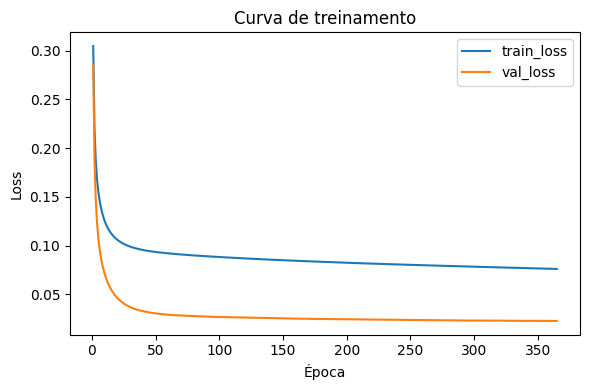

In [24]:
hist = mlp.get_history().as_dict()

# CURVA DE TREINAMENTO
plt.figure(figsize=(6,4))
plt.plot(hist["epoch"], hist["train_loss"], label="train_loss")

plt.plot(hist["epoch"], [np.nan if v is None else v for v in hist["val_loss"]], label="val_loss")

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Curva de treinamento")
plt.legend()
plt.tight_layout()
plt.show()

Com relação ao gráfico de treinamento, é possível perceber a melhora constante do modelo durante as épocas, e que mesmo no conjunto de validação, essa melhora acontece de forma linear.

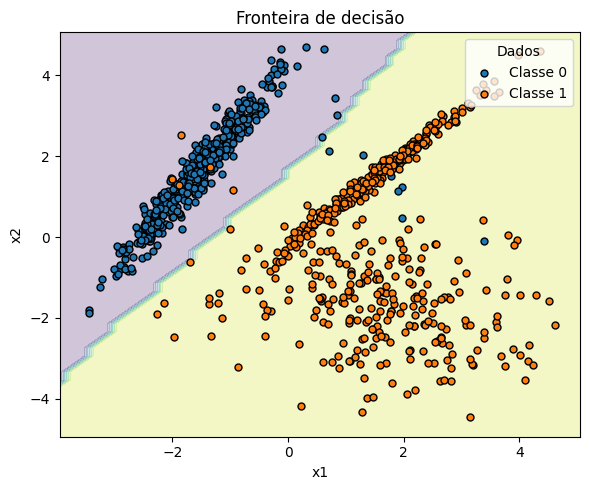

In [25]:
# FRONTEIRA DE DECISÃO TRAÇADA
x_min = X[:,0].min()-0.5
x_max = X[:,0].max()+0.5

y_min = X[:,1].min()-0.5
y_max = X[:,1].max()+0.5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.2),
    np.arange(y_min, y_max, 0.2)
)
grid = np.c_[xx.ravel(), yy.ravel()]
zz = mlp.predict(grid).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, zz, alpha=0.25)

idx0 = (y == 0)
idx1 = (y == 1)

plt.scatter(X[idx0, 0], X[idx0, 1], s=25, edgecolor="k", label="Classe 0")
plt.scatter(X[idx1, 0], X[idx1, 1], s=25, edgecolor="k", label="Classe 1")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Fronteira de decisão")
plt.legend(title="Dados", loc="upper right")
plt.tight_layout()
plt.show()

No entanto, já olhando para o conjunto de dados, e as fronteiras de decisão em teoria propostas pelo modelo, é interessante perceber que mesmo os ruídos adicionados pelo parâmetro *flip_y* não foram o suficientes para afetar o modelo de convergir para uma fronteira muito concreta de decisão. Outro ponto relevante é perceber na classe 1 os dois clusters de dados, um com uma "reta" muito concentrada e outro com pontos mais dispersos formando uma elipse.

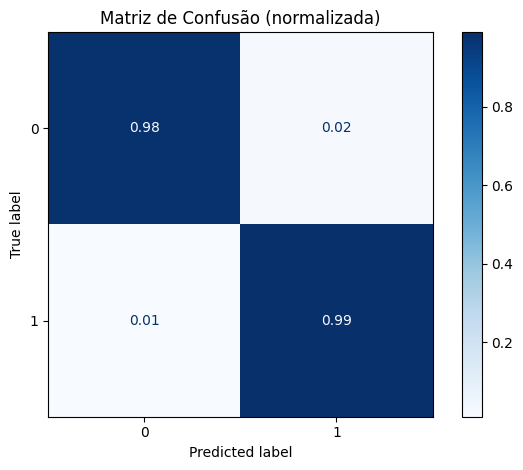

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

proba_te = mlp.predict_proba(Xte)
y_pred = (proba_te >= 0.5).astype(int)

cm_norm = confusion_matrix(yte, y_pred, labels=[0,1], normalize="true")
ConfusionMatrixDisplay(cm_norm, display_labels=[0,1]).plot(cmap="Blues", colorbar=True)

plt.title("Matriz de Confusão (normalizada)")
plt.tight_layout()
plt.show()

Um aspecto extra que a matriz de confusão traz é onde o erro está localizado. No caso, por mais que o modelo tenha errado muito pouco, ele errou mais categorizando a classe 0 do que a 1, errando 2% dos casos da classe 0, prevendo como 1.

## Classificação multi-classe com MLP

Com um novo desafio, e um aspecto ainda não abordado nesse projeto, esse trecho dessa secção trará o desafio do modelo de lidar com a classifição além dos "Sim" e "Não", com a adesão de mais uma classe ao conjunto de dados. A ideia aqui, é entender como que um MLP lida com o fato de ao final de cada observação ele ter que decidir entre [0, 1, 2]. Para esse conjunto de dados, foram reformulados os parâmetros utilizados para construir as classes.

- Número de amostras `n_samples`: 1500
- Número de classes: 3
- Número de clusters por classe `n_clusters_per_class`: 2, em uma, 3 em outra e 4 na última
- Número de features `n_features`: 4
    - Número de features efetivas `n_informative`: 4
    - Número de features redundantes `n_redundant`: 0
- Dispersão das classes `class_sep`: 1.6
- Ruído das classes `flip_y`: 0.02
- Semente de aleatorização `random_state`: 42

In [27]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_STATE = 42

XA, yA = make_classification(
    n_samples=1500,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=2,
    weights=[0.33, 0.33, 0.33],
    class_sep=1.6,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

XA0 = XA[yA==0]

XB, yB = make_classification(
    n_samples=1500,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=3,
    weights=[0.33, 0.33, 0.33],
    class_sep=1.6,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

XB1 = XB[yB==1]

XC, yC = make_classification(
    n_samples=1500,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=4,
    weights=[0.33, 0.33, 0.33],
    class_sep=1.6,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

XC2 = XC[yC==2]

X = np.vstack([XA0, XB1, XC2])
y = np.concatenate([
    np.zeros(len(XA0), dtype=int),
    np.ones (len(XB1), dtype=int),
    np.ones (len(XC2), dtype=int) * 2
])

Aqui novamente, para alcançar as classes com diferentes números de clusters, é necessário criar as classes de forma separada e após isso, juntar todas.

In [28]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

In [29]:
mlp = MLPClassifierScratch(
    Xtr, ytr,
    hidden_layer_sizes=(16,),
    activation="tanh",
    output_activation="softmax",
    loss="cce",
    eta=0.05,
    batch_size=32,
    max_epochs=400,
    validation_fraction=0.2,
    patience=30,
    seed=RANDOM_STATE,
    bias_as_weight=True
)

mlp.train(verbose=False)

Uma mudança que se faz necessária nesse caso, é a métrica de erro utilizada para atualizar os pesos. Como nesse caso, os dados são multi-classe, o BCE não é mais possível de ser utilizado. Diante disso, foi implementado o CCE e o softmax pois, para problemas multiclasse com rótulos mutuamente exclusivos a softmax transforma os “logits” em uma distribuição de probabilidade sobre as K classes condição necessária quando há mais de duas classes. E com isso, o CCE é o negativo do log-verossimilhança do modelo multinomial, Otimizá-la equivale a maximizar a probabilidade da classe correta e a minimizar a divergência entre a distribuição alvo e a distribuição prevista.

In [30]:
print("Razão de parada:", mlp.stop_reason)
print("Acurácia de teste:", mlp.score(Xte, yte) * 100)

Razão de parada: No improvement for 30 epochs
Acurácia de teste: 79.40199335548172


Novamente, mesmo com mais classes e mais clusters em cada classe, o modelo convergiu. No entanto, interessante pontuar que a acurácia aqui diminuiu consideravelmente. Isso acontece provavelmente por conta da quantidade de clusters adicionados entre as classes, o que criou um emaranhado de dados sobrepostos, aumentando a dificultade de separação destes. No gráfico de dispersão dos dados abaixo, é possível ver que os dados ficaram bastante sobrepostos e de difícil separação.

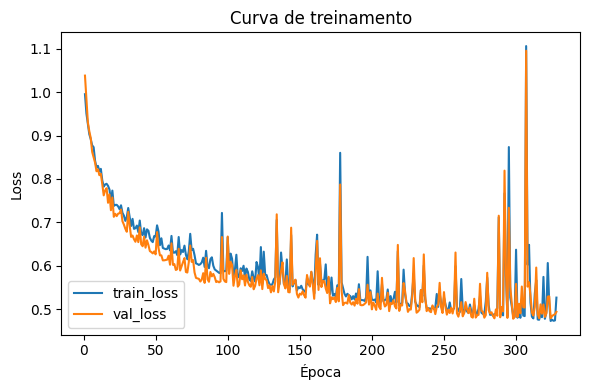

In [31]:
hist = mlp.get_history().as_dict()

plt.figure(figsize=(6,4))
plt.plot(hist["epoch"], hist["train_loss"], label="train_loss")

plt.plot(hist["epoch"], [np.nan if v is None else v for v in hist["val_loss"]], label="val_loss")

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Curva de treinamento")
plt.legend()
plt.tight_layout()
plt.show()

Com relação a curva de aprendizado no conjunto de treinamento, o modelo novamente apresenta um aprendizado contínuo. Porém, é um ponto relevante perceber a variabilidade dos resultados, com diversos *spikes* durante o processo de treinamento, por mais que num olhar macro o erro estivesse descendo.

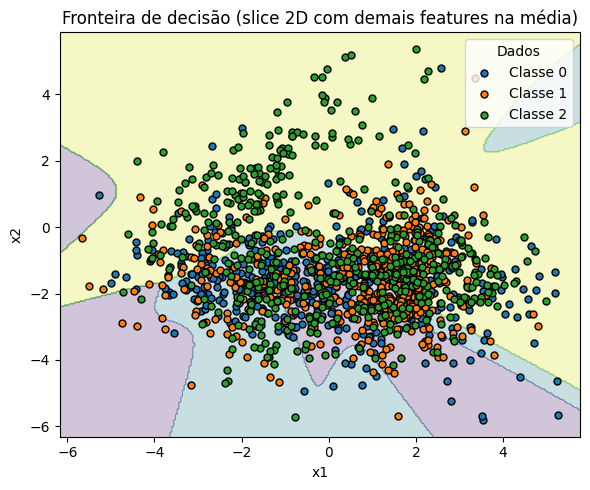

In [32]:
feat_x, feat_y = 0, 1

x_min, x_max = X[:, feat_x].min() - 0.5, X[:, feat_x].max() + 0.5
y_min, y_max = X[:, feat_y].min() - 0.5, X[:, feat_y].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

X_means = Xtr.mean(axis=0)
grid_full = np.tile(X_means, (xx.size, 1))

grid_full[:, feat_x] = xx.ravel()
grid_full[:, feat_y] = yy.ravel()

zz = mlp.predict(grid_full).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, zz, alpha=0.25)

for cls in np.unique(y):
    idx = (y == cls)
    plt.scatter(X[idx, feat_x], X[idx, feat_y], s=25, edgecolor="k", label=f"Classe {cls}")

plt.xlabel(f"x{feat_x+1}")
plt.ylabel(f"x{feat_y+1}")
plt.title("Fronteira de decisão (slice 2D com demais features na média)")
plt.legend(title="Dados", loc="upper right")
plt.tight_layout()
plt.show()

Sobre a disposição dos dados, ao utilizar 3 classes e vários clusters em cada uma, até a olho nu é difícil de separar as classes, por conta da alta sobreposição dos valores. Além disso, pelo fato de o conjunto de variáveis independentes contarem com 4 features, a visualização dos dados também fica prejudicada, uma vez que é possível apenas visualizar de forma simples e prática em até 3 dimensões e não quatro.

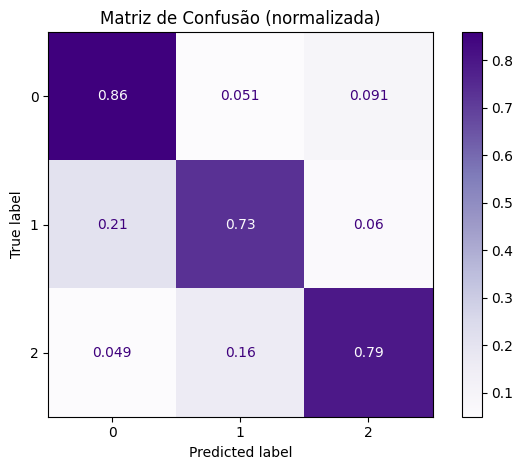

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = mlp.predict(Xte)

labels = np.unique(yte)

cm_norm = confusion_matrix(yte, y_pred, labels=labels, normalize="true")
ConfusionMatrixDisplay(cm_norm, display_labels=labels).plot(cmap="Purples", colorbar=True)

plt.title("Matriz de Confusão (normalizada)")
plt.tight_layout()
plt.show()

Sobre a matriz de confusão, o cruzamento de classes com maior erro por parte do modelo, foi entre a classe 1 e a 0. Nesse espaço, o modelo categorizou 21% das observações de forma errada, assumindo que a classe 1, na verdade era a 0. A grandeza desse erro é interessante, uma vez que é muito mais relevante do que nos dados explorados anteriormente, no caso binário, onde o maior erro foi próximo de 2%.

## Classificação multi-classe com Deep MLP

Por fim, o útlimo experimento realizado foi utilizando o maior poder do MLP, a possibilidade de expandir infinitamente a quantidade de camadas de "Perceptrons" dentro do modelo, o que traz uma vantagem e tanta no momento de se adaptar a conjuntos de dados complexos e com alta sobreposição, como foi o caso anterior. Com relação a geração dos dados em si, essa não será alterada, pois a ideia é justamente comparar um MLP com apenas duas camadas (uma oculta e outra de saída) e outro com várias camadas ocultas. Dessa forma, o conjunto de dados continua respeitando os mesmos parâmetros.


- Número de amostras `n_samples`: 1500
- Número de classes: 3
- Número de clusters por classe `n_clusters_per_class`: 2, em uma, 3 em outra e 4 na última
- Número de features `n_features`: 4
    - Número de features efetivas `n_informative`: 4
    - Número de features redundantes `n_redundant`: 0
- Dispersão das classes `class_sep`: 1.6
- Ruído das classes `flip_y`: 0.02
- Semente de aleatorização `random_state`: 42

In [34]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_STATE = 42

XA, yA = make_classification(
    n_samples=1500,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=2,
    weights=[0.33, 0.33, 0.33],
    class_sep=1.6,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

XA0 = XA[yA==0]

XB, yB = make_classification(
    n_samples=1500,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=3,
    weights=[0.33, 0.33, 0.33],
    class_sep=1.6,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

XB1 = XB[yB==1]

XC, yC = make_classification(
    n_samples=1500,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=4,
    weights=[0.33, 0.33, 0.33],
    class_sep=1.6,
    flip_y=0.05,
    random_state=RANDOM_STATE
)

XC2 = XC[yC==2]

X = np.vstack([XA0, XB1, XC2])
y = np.concatenate([
    np.zeros(len(XA0), dtype=int),
    np.ones (len(XB1), dtype=int),
    np.ones (len(XC2), dtype=int) * 2
])

In [35]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

In [36]:
mlp = MLPClassifierScratch(
    Xtr, ytr,
    hidden_layer_sizes=(128, 64, 32, 16),
    activation="tanh",
    output_activation="softmax",
    loss="cce",
    eta=0.05,
    batch_size=32,
    max_epochs=400,
    validation_fraction=0.2,
    patience=30,
    seed=RANDOM_STATE,
    bias_as_weight=True
)

mlp.train(verbose=False)

Como citado, foram implementadas 4 camadas ocultas, com diferentes quantidade de neurônios em cada uma. No restante dos parâmetros, nada foi alterado, para justamente ser possível a comparação puramente em quantidade de camadas ocultas aplicadas.

In [37]:
print("Razão de parada:", mlp.stop_reason)
print("Acurácia de teste:", mlp.score(Xte, yte) * 100)

Razão de parada: No improvement for 30 epochs
Acurácia de teste: 81.72757475083057


O resutado encontrado nesse experimento é de longe o mais interessante, uma vez que, por mais que foram implementadas 3 novas camadas ocultas, o uso dessas no mesmo conjunto de dados anterior foi capaz de melhorar a acurácia de teste em apenas aproximadamente 2 pontos percentuais. Claro que 2 p.p. em alguns casos é um grande avanço, mas tendo em vista de que se trata de um conjunto de dados sintético, o resultado de certa forma é ruim, pois os dados não possuem tamanha complexidade e poderiam ser melhor categorizados.

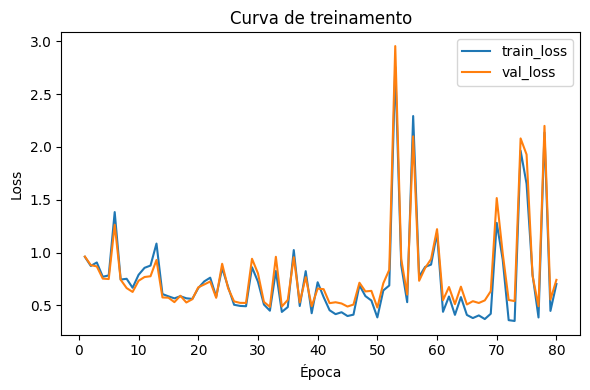

In [38]:
hist = mlp.get_history().as_dict()

plt.figure(figsize=(6,4))
plt.plot(hist["epoch"], hist["train_loss"], label="train_loss")

plt.plot(hist["epoch"], [np.nan if v is None else v for v in hist["val_loss"]], label="val_loss")

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Curva de treinamento")
plt.legend()
plt.tight_layout()
plt.show()

Com relação ao progesso de treinamento, esse é bem divergente dos anteriormente vistos, uma vez que do ponto inicial até o final, o erro diminuiu, no entanto, a grandeza de redução é muito pequena, além de que essa conta com diversos spikes durante o percurso, retomando o erro para valores maiores inclusive que o inicial.

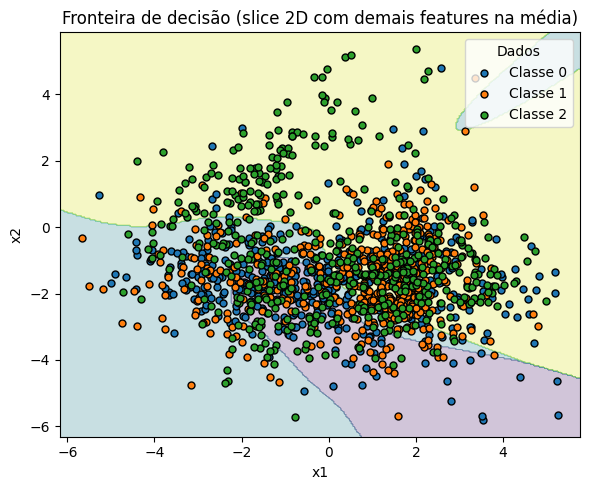

In [39]:
feat_x, feat_y = 0, 1

x_min, x_max = X[:, feat_x].min() - 0.5, X[:, feat_x].max() + 0.5
y_min, y_max = X[:, feat_y].min() - 0.5, X[:, feat_y].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

X_means = Xtr.mean(axis=0)
grid_full = np.tile(X_means, (xx.size, 1))

grid_full[:, feat_x] = xx.ravel()
grid_full[:, feat_y] = yy.ravel()

zz = mlp.predict(grid_full).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, zz, alpha=0.25)

for cls in np.unique(y):
    idx = (y == cls)
    plt.scatter(X[idx, feat_x], X[idx, feat_y], s=25, edgecolor="k", label=f"Classe {cls}")

plt.xlabel(f"x{feat_x+1}")
plt.ylabel(f"x{feat_y+1}")
plt.title("Fronteira de decisão (slice 2D com demais features na média)")
plt.legend(title="Dados", loc="upper right")
plt.tight_layout()
plt.show()

Comparando como ficaram as fronteiras de decisão no útlimo caso e nesse, é possível compreender que a maior quantidade de camadas alterou principalmente como o modelo percebe as fronteiras em x2 < 0. Uma vez que a fronteira amarela quase não foi alterada, e apenas houve uma maior separação nas fronteiras azul e lilás, em que a azul predomoniou x1 < -1 e a lilás x1 > -1.

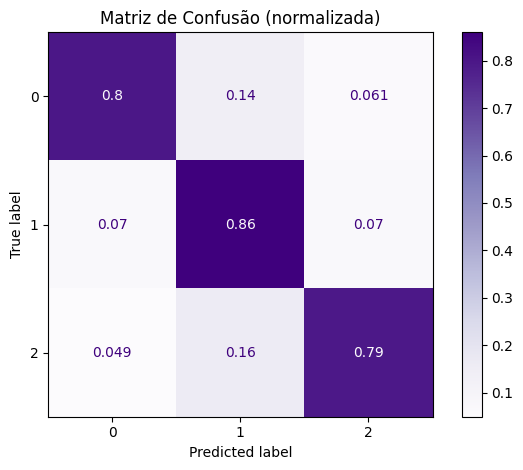

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = mlp.predict(Xte)

labels = np.unique(yte)

cm_norm = confusion_matrix(yte, y_pred, labels=labels, normalize="true")
ConfusionMatrixDisplay(cm_norm, display_labels=labels).plot(cmap="Purples", colorbar=True)

plt.title("Matriz de Confusão (normalizada)")
plt.tight_layout()
plt.show()

Por fim, com relação a matriz de confusão, o maior avanço sobre o último exemplo foi focado no cruzamento de classes com maior confusão e também na grandeza dessa confusão. Anteriormente o maior erro era entre as classes 0 e 1, com 21% das classificações da classe 1, erradas como 0. Agora o modelo errou mais entre as classes 1 e 2, com 16% das classificações da classe 2, erradas como 1.